# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

import tensorflow as tf
import tensorflow_datasets as tfds
from collections import Counter
from ipywidgets import IntProgress
from IPython.display import display

In [2]:
from utils import get_dataset

In [3]:
%matplotlib inline

In [4]:
dataset_path = "project_data/processed/*.tfrecord"
dataset = get_dataset(dataset_path)

INFO:tensorflow:Reading unweighted datasets: ['project_data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['project_data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [5]:
frame = [f for f in dataset.take(1)][0]
print("\n".join(frame.keys()))

image
source_id
key
filename
groundtruth_image_confidences
groundtruth_verified_neg_classes
groundtruth_not_exhaustive_classes
groundtruth_boxes
groundtruth_area
groundtruth_is_crowd
groundtruth_difficult
groundtruth_group_of
groundtruth_weights
groundtruth_classes
groundtruth_image_classes
original_image_spatial_shape


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [6]:
CLASS_COLOR = {
    1 : "r",
    2 : "b",
    4 : "g"
}
def plot_boxes(ax, boxes, classes, shape):
    for box, object_class in zip(boxes, classes): 
        miny, minx, maxy, maxx =  box.numpy()
        color = CLASS_COLOR[object_class.numpy()]
        dx = (maxx - minx) * shape[0]
        dy = (maxy - miny) * shape[1]
        x = minx * shape[0]
        y = miny * shape[1]
        
        rect = patches.Rectangle((x, y), dx, dy, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
#         break
        
def process_frame(ax, frame):
    image = frame["image"]
    ax.imshow(image)
    plot_boxes(ax, frame["groundtruth_boxes"], frame["groundtruth_classes"], image.shape)
# ax = plt.figure().gca()
# process_frame(ax, frame)

# plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

CPU times: user 5.52 s, sys: 5.12 s, total: 10.6 s
Wall time: 2.38 s


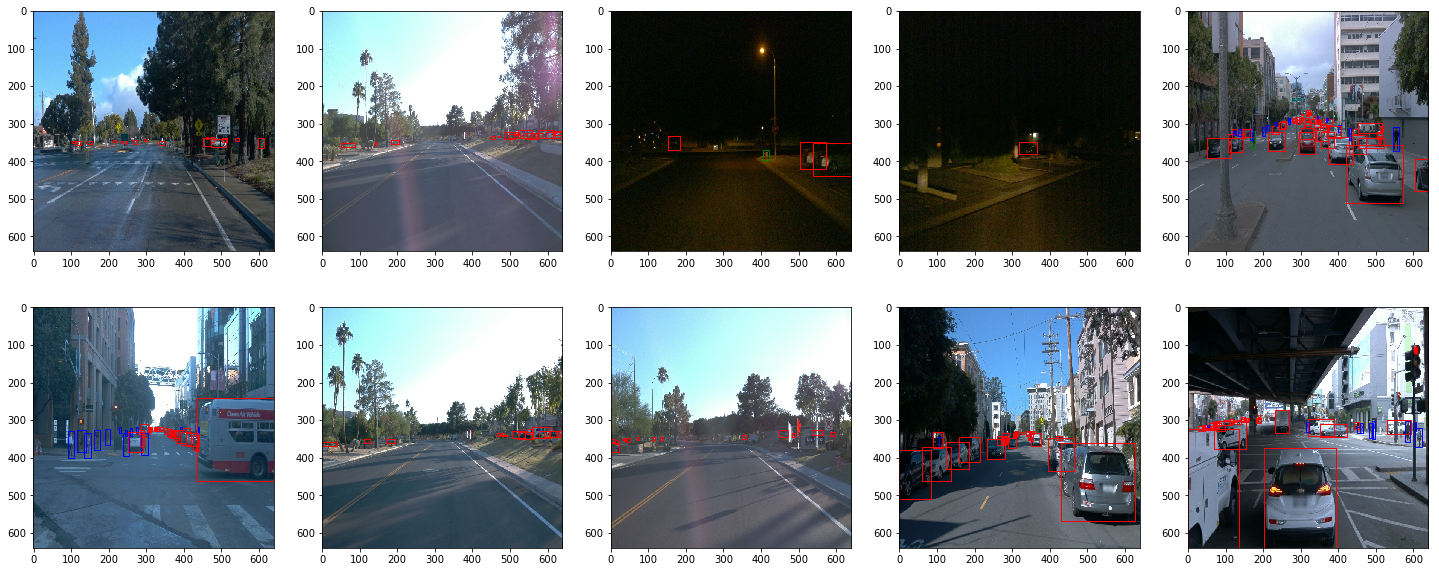

In [7]:
%%time
n, m = 2, 5
fig, axes = plt.subplots(n, m, figsize=(m * 5, n * 5))
frames = dataset.shuffle(1, seed=17)
for ax, frame in zip(np.hstack(axes), frames):
    process_frame(ax, frame)
fig.savefig("result/ten_frames.png")

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [8]:
%%time
frames_count = 10**6
counter = Counter()

progress = IntProgress(min=0, max=frames_count, value=0)
display(progress)

frames = dataset.shuffle(1, seed=17)
for fid, frame in enumerate(frames):
    nparr = frame["groundtruth_classes"].numpy()
    unique, counts = np.unique(nparr, return_counts=True)
    for val, count in zip(unique, counts):
        counter[val] += count
        
    progress.value = fid
    if (fid + 1) % frames_count == 0:
        break


IntProgress(value=0, max=1000000)

CPU times: user 2h 6min 57s, sys: 6min 46s, total: 2h 13min 43s
Wall time: 32min 45s


In [9]:
CLASS_NAMES = {
    1 : "vehicle",
    2 : "pedestrian",
    4 : "cyclist",
}

In [10]:
for class_id, count in counter.items():
    print(f"total number of the {CLASS_NAMES[class_id]} is {count}")

total number of the vehicle is 17812707
total number of the pedestrian is 5235971
total number of the cyclist is 133228


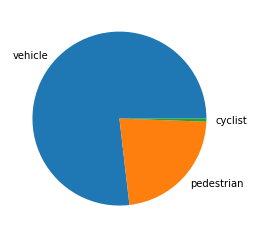

In [11]:
counts = []
classes = []
fig = plt.figure()
for class_id, count in counter.items():
    counts.append(count)
    classes.append(CLASS_NAMES[class_id])
    
plt.pie(counts, labels=classes)

fig.savefig("result/claas_distribution.png")
pass